In [24]:
import os
import numpy as np
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Path to the folder containing your txt files
folder_path_train = 'C:/Users/imsum/UCD/Summer/Project/yolo_od/PascalYoloFull/train/labels'
folder_path_valid = 'C:/Users/imsum/UCD/Summer/Project/yolo_od/PascalYoloFull/valid/labels'
folder_path_test = 'C:/Users/imsum/UCD/Summer/Project/yolo_od/PascalYoloFull/test/labels'

In [4]:
# Initialize a counter
number_count = 0

# Loop through all files in the train folder
labels = np.array([])
for filename in os.listdir(folder_path_train):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path_train, filename)
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line by whitespace and get the first column
                first_column = line.split()[0]
                labels = np.append(labels, int(first_column))
                # Check if the first column is a number
                if first_column.isdigit():
                    number_count += 1

print(f'Total count of numbers in the first column: {number_count}')

Total count of numbers in the first column: 10573


In [ ]:
# Loop through all files in the valid folder
for filename in os.listdir(folder_path_valid):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path_valid, filename)
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line by whitespace and get the first column
                first_column = line.split()[0]
                labels = np.append(labels, int(first_column))
                # Check if the first column is a number
                if first_column.isdigit():
                    number_count += 1

print(f'Total count of numbers in the first column: {number_count}')

In [ ]:
# Loop through all files in the test folder
for filename in os.listdir(folder_path_test):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path_test, filename)
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line by whitespace and get the first column
                first_column = line.split()[0]
                labels = np.append(labels, int(first_column))
                # Check if the first column is a number
                if first_column.isdigit():
                    number_count += 1


print(f'Total count of numbers in the first column: {number_count}')

In [5]:
print(Counter(labels))

Counter({np.float64(14.0): 3512, np.float64(6.0): 1082, np.float64(8.0): 978, np.float64(4.0): 482, np.float64(15.0): 454, np.float64(2.0): 412, np.float64(11.0): 385, np.float64(1.0): 299, np.float64(17.0): 298, np.float64(12.0): 280, np.float64(7.0): 272, np.float64(3.0): 261, np.float64(19.0): 260, np.float64(13.0): 251, np.float64(0.0): 241, np.float64(16.0): 238, np.float64(18.0): 226, np.float64(9.0): 224, np.float64(10.0): 223, np.float64(5.0): 195})


In [20]:
names = pd.DataFrame(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'])
names.columns = ['name']

,name
0,aeroplane
1,bicycle
2,bird
3,boat
4,bottle
5,bus
6,car
7,cat
8,chair
9,cow


In [17]:
labels_df = pd.DataFrame(labels)

In [26]:
df_name_freq = pd.merge(left=labels_df, right=names, left_on=0, right_index=True)

<Axes: xlabel='name'>

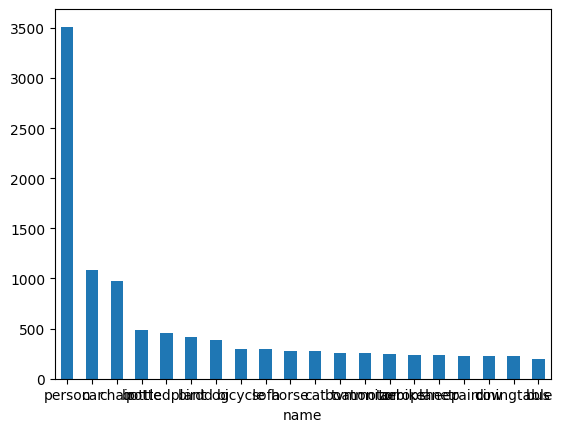

In [27]:
df_name_freq['name'].value_counts().plot.bar(rot=0)

C:\Users\imsum\AppData\Local\Temp\ipykernel_25792\509799811.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', 20)


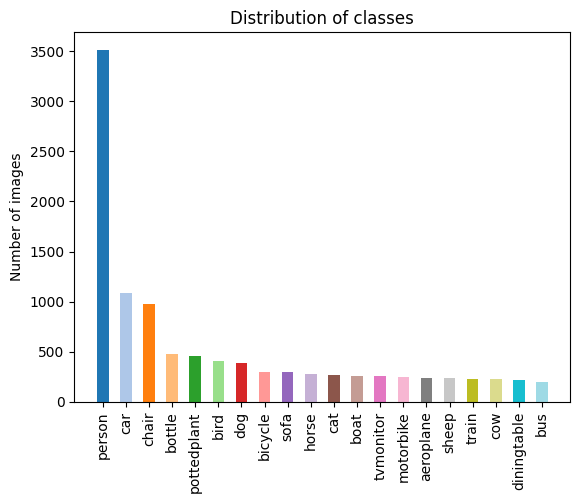

In [35]:
categories = df_name_freq['name'].value_counts().index
counts = df_name_freq['name'].value_counts().values

# Generate a color map with 20 different colors
colors = plt.cm.get_cmap('tab20', 20)

plt.bar(categories, counts, color=colors(np.arange(20)), width=0.5)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add labels and title
#plt.xlabel('Name Categories')
plt.ylabel('Number of images')
plt.title('Distribution of classes')

plt.savefig('pascal_voc_dist.png', dpi=300, bbox_inches='tight')

plt.show()